# Bloque 4 Cardiología: Práctica 1 - Introducción a la Cardiología

### Objetivo de la Práctica

En esta práctica, nos adentraremos en el fascinante mundo de la cardiología. Nuestro objetivo principal es comprender los diferentes modelos de potencial de acción y analizar ejemplos de señales cardíacas que presentan diversas patologías. Esta introducción te proporcionará una base sólida para entender cómo funcionan los mecanismos eléctricos del corazón y cómo se manifiestan las alteraciones en las señales electrocardiográficas.

### Contenidos

1. **Modelos de Potencial de Acción**
   - Descripción de los diferentes tipos de potencial de acción en las células cardíacas.
   - Comparación entre los diferentes modelos de potenciales de acción.

2. **Señales Cardíacas y Patologías**
   - Análisis de señales electrocardiográficas (ECG) normales.
   - Identificación y estudio de señales con patologías comunes como:
     - Contracción Ventricular Prematura (PVC)
     - Fibrilación Auricular (FA)
     - Bloqueo de Rama Derecha (RBBB)
     - Bloqueo de Rama Izquierda (LBBB)


# Modelo de Hodgkin-Huxley

El modelo de Hodgkin-Huxley es un conjunto de ecuaciones diferenciales que describen cómo los potenciales de acción en las neuronas son iniciados y propagados. Este modelo se basa en la dinámica de los canales iónicos de sodio (Na\($^+$\)) y potasio (K\($^+$\)) a través de la membrana neuronal.

## Ecuaciones del Modelo

### 1. Ecuación del Potencial de Membrana

La ecuación principal describe el cambio en el potencial de membrana \($V$\) en función del tiempo \($t$\):

$$
C_m \frac{dV}{dt} = I_{ext} - I_{Na} - I_{K} - I_{L}
$$

donde:
- \($C_m$\) es la capacitancia de la membrana.
- \($I_{ext}$\) es la corriente externa aplicada.
- \($I_{Na}$\) es la corriente de sodio.
- \($I_{K}$\) es la corriente de potasio.
- \($I_{L}$\) es la corriente de fuga.

### 2. Corrientes Iónicas

Las corrientes iónicas se describen mediante las siguientes ecuaciones:

#### Corriente de Sodio (\($I_{Na}$\)):

$$
I_{Na} = g_{Na} m^3 h (V - E_{Na})
$$

donde:
- \($g_{Na}$\) es la conductancia máxima de sodio.
- \($m$\) es la variable de compuerta de activación de sodio.
- \($h$\) es la variable de compuerta de inactivación de sodio.
- \($E_{Na}$\) es el potencial de reversión de sodio.

#### Corriente de Potasio (\($I_{K}$\)):

$$
I_{K} = g_{K} n^4 (V - E_{K})
$$

donde:
- \($g_{K}$\) es la conductancia máxima de potasio.
- \($n$\) es la variable de compuerta de activación de potasio.
- \($E_{K}$\) es el potencial de reversión de potasio.

#### Corriente de Fuga (\($I_{L}$\)):

$$
I_{L} = g_{L} (V - E_{L})
$$

donde:
- \($g_{L}$\) es la conductancia de fuga.
- \($E_{L}$\) es el potencial de reversión de la corriente de fuga.

### 3. Ecuaciones de las Variables de Compuerta

Las variables de compuerta \($m$\), \($h$\) y \($n$\) siguen ecuaciones diferenciales de primer orden:

$$
\frac{dm}{dt} = \alpha_m (1 - m) - \beta_m m
$$

$$
\frac{dh}{dt} = \alpha_h (1 - h) - \beta_h h
$$

$$
\frac{dn}{dt} = \alpha_n (1 - n) - \beta_n n
$$

donde \($\alpha$\) y \($\beta$\) son funciones del potencial de membrana \($V$\):

#### Funciones \($\alpha$\) y \($\beta$\):

Para \($m$\):
$$
\alpha_m(V) = \frac{0.1 (V + 40)}{1 - \exp(-(V + 40) / 10)}
$$
$$
\beta_m(V) = 4 \exp(-(V + 65) / 18)
$$

Para \($h$\):
$$
\alpha_h(V) = 0.07 \exp(-(V + 65) / 20)
$$
$$
\beta_h(V) = \frac{1}{1 + \exp(-(V + 35) / 10)}
$$

Para \($n$\):
$$
\alpha_n(V) = \frac{0.01 (V + 55)}{1 - \exp(-(V + 55) / 10)}
$$
$$
\beta_n(V) = 0.125 \exp(-(V + 65) / 80)
$$



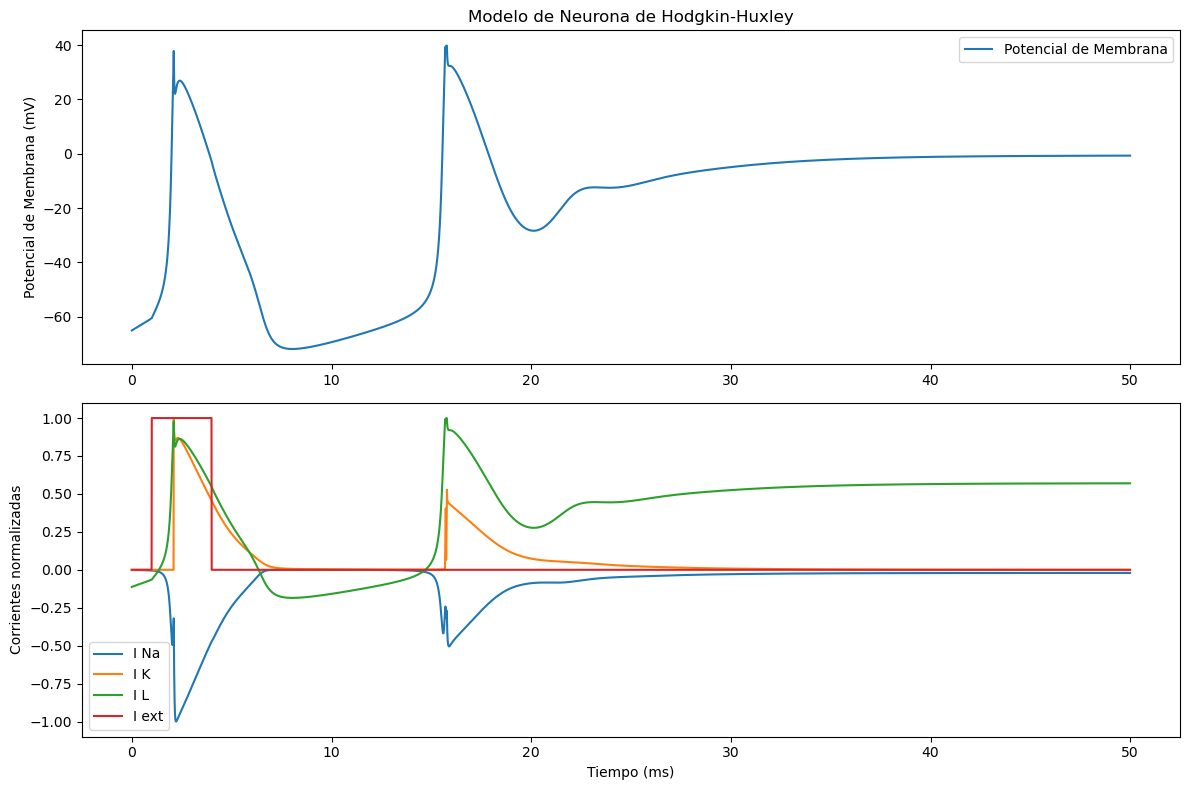

In [ ]:
import numpy as np  # Importar la biblioteca numpy para manejo de arreglos y funciones matemáticas
import matplotlib.pyplot as plt  # Importar la biblioteca matplotlib para graficar

# Constantes
C_m = 1.0  # Capacitancia de la membrana, en uF/cm^2
g_Na = 120.0  # Conductancia máxima de sodio, en mS/cm^2
g_K = 36.0  # Conductancia máxima de potasio, en mS/cm^2
g_L = 0.3  # Conductancia de fuga, en mS/cm^2
E_Na = 50.0  # Potencial de reversión de Nernst para el sodio, en mV
E_K = -77.0  # Potencial de reversión de Nernst para el potasio, en mV
E_L = -54.387  # Potencial de reversión de Nernst para la fuga, en mV

# Parámetros de tiempo
t = np.arange(0.0, 50.0, 0.01)  # Vector de tiempo desde 0 hasta 50 ms con incrementos de 0.01 ms

# Corriente externa
I_ext = np.zeros(len(t))  # Inicializar la corriente externa como un vector de ceros
I_ext[100:400] = 10.0  # Aplicar una corriente externa de 10 uA/cm^2 entre 1 y 4 ms

# Funciones para las variables de compuerta
def alpha_n(V):
    return (0.1*(V+40))/(1-np.exp(-V+40)/10) # Tasa de apertura de las compuertas de potasio

def beta_n(V):
    return 0.125*np.exp(-(V+65)/80) # Tasa de cierre de las compuertas de potasio

def alpha_m(V):
    return (0.1*(V+40))/(1-np.exp(-(V+40)/10))  # Tasa de apertura de las compuertas de sodio

def beta_m(V):
    return 4*np.exp(-(V+65)/18)  # Tasa de cierre de las compuertas de sodio

def alpha_h(V):
    return 0.07*np.exp(-(V+65)/20) # Tasa de apertura de las compuertas de inactivación de sodio

def beta_h(V):
    return 1/(1+np.exp(-(V+35)/10)) # Tasa de cierre de las compuertas de inactivación de sodio

# Inicializar variables
V = -65.0  # Potencial de membrana inicial, en mV
n = alpha_n(V) / (alpha_n(V) + beta_n(V))  # Probabilidad inicial de apertura de las compuertas de potasio
m = alpha_m(V) / (alpha_m(V) + beta_m(V))  # Probabilidad inicial de apertura de las compuertas de sodio
h = alpha_h(V) / (alpha_h(V) + beta_h(V))  # Probabilidad inicial de cierre de las compuertas de sodio

# Listas para almacenar los resultados
V_trace = []  # Lista para almacenar el potencial de membrana a lo largo del tiempo
I_Na_trace = []  # Lista para almacenar la corriente de sodio a lo largo del tiempo
I_K_trace = []  # Lista para almacenar la corriente de potasio a lo largo del tiempo
I_L_trace = []  # Lista para almacenar la corriente de fuga a lo largo del tiempo

# Modelo de Hodgkin-Huxley
for i in range(len(t)):
    V_trace.append(V)  # Almacenar el potencial de membrana actual

    
    I_Na = g_Na*np.power(m,3)*h*(V-E_Na) # Calcular la corriente de sodio 
    
    I_K = g_K*np.power(n,4)*(V-E_K) # Calcular la corriente de potasio
    I_L = g_L*(V-E_L) # Calcular la corriente de fuga

    # Almacenar las corrientes actuales 
    I_Na_trace.append(I_Na)
    I_K_trace.append(I_K)
    I_L_trace.append(I_L)

    # Actualizar el potencial de membrana usando la ecuación diferencial de Hodgkin-Huxley
    V += (I_ext[i] - I_Na - I_K - I_L) / C_m * (t[1] - t[0])

    # Actualizar las variables de compuerta usando las ecuaciones diferenciales correspondientes
    n += (alpha_n(V) * (1 - n) - beta_n(V) * n) * (t[1] - t[0])
    m += (alpha_m(V) * (1 - m) - beta_m(V) * m) * (t[1] - t[0])
    h += (alpha_h(V) * (1 - h) - beta_h(V) * h) * (t[1] - t[0])

# Graficar los resultados
plt.figure(figsize=(12, 8))  # Crear una figura de tamaño 12x8 pulgadas

plt.subplot(2, 1, 1)  # Crear el primer subplot (2 filas, 1 columna, primer gráfico)
plt.title("Modelo de Neurona de Hodgkin-Huxley")  # Título del gráfico
plt.plot(t, V_trace, label="Potencial de Membrana")  # Graficar el potencial de membrana
plt.ylabel("Potencial de Membrana (mV)")  # Etiqueta del eje y
plt.legend()  # Mostrar la leyenda

plt.subplot(2, 1, 2)  # Crear el segundo subplot (2 filas, 1 columna, segundo gráfico)
plt.plot(t, I_Na_trace / max(abs(np.array(I_Na_trace))), label="I Na")  # Graficar la corriente de sodio normalizada
plt.plot(t, I_K_trace / max(abs((np.array(I_K_trace)))), label="I K")  # Graficar la corriente de potasio normalizada
plt.plot(t, I_L_trace / max(abs((np.array(I_L_trace)))), label="I L")  # Graficar la corriente de fuga normalizada
plt.plot(t, I_ext / max(abs(I_ext)), label="I ext")  # Graficar la corriente externa normalizada
plt.xlabel("Tiempo (ms)")  # Etiqueta del eje x
plt.ylabel("Corrientes normalizadas")  # Etiqueta del eje y
plt.legend()  # Mostrar la leyenda

plt.tight_layout()  # Ajustar el diseño para que no haya solapamientos
plt.show()  # Mostrar los gráficos

## Introducción al Modelo de Noble

El modelo de Noble es uno de los primeros modelos matemáticos desarrollados para describir la actividad eléctrica del corazón. Fue propuesto por Denis Noble en 1962 y se basa en el modelo de Hodgkin-Huxley, originalmente desarrollado para describir la propagación del potencial de acción en neuronas. El modelo de Noble se centra en las células del nodo sinoauricular del corazón, que son responsables de generar los impulsos eléctricos que regulan el ritmo cardíaco.


### Componente: Membrana
La ecuación para el potencial de membrana \($ V $\) es:
$$
\frac{dV}{dt} = -\frac{(i_{Na} + i_{K} + i_{Leak})}{C_m}
$$
donde:
- \($ i_{Na} $\): Corriente de sodio
- \($ i_{K} $\): Corriente de potasio
- \($ i_{Leak} $\): Corriente de fuga
- \($ C_m $\): Capacitancia de la membrana

### Componente: Canal de Sodio
La conductancia del canal de sodio \($ g_{Na} $\) está dada por:
$$
g_{Na} = m^3 h g_{Na\_max}
$$
La corriente de sodio \($ i_{Na} $\) es:
$$
i_{Na} = g_{Na} (V - E_{Na})
$$

#### Subcomponente: Puerta m del Canal de Sodio
Las ecuaciones para las tasas de transición de la puerta \($ m $\) son:
$$
\alpha_m = 100 \frac{-(V + 48)}{e^{-(V + 48)/15} - 1}
$$
$$
\beta_m = 120 \frac{(V + 8)}{e^{(V + 8)/5} - 1}
$$
La ecuación diferencial para \($ m $\) es:
$$
\frac{dm}{dt} = \alpha_m (1 - m) - \beta_m m
$$

#### Subcomponente: Puerta h del Canal de Sodio
Las ecuaciones para las tasas de transición de la puerta \($ h $\) son:
$$
\alpha_h = 170 e^{-(V + 90)/20}
$$
$$
\beta_h = 1000 \frac{1}{1 + e^{-(V + 42)/10}}
$$
La ecuación diferencial para \($ h $\) es:
$$
\frac{dh}{dt} = \alpha_h (1 - h) - \beta_h h
$$

### Componente: Canal de Potasio
La corriente de potasio \($ i_{K} $\) es:
$$
i_{K} = (g_{K1} + g_{K2}) (V + 100)
$$
donde:
- \($ g_{K1} $\) y \($ g_{K2} $\) son las conductancias del canal de potasio.

#### Subcomponente: Conductancia \($ g_{K1} $\)
La conductancia \($ g_{K1} $\) está dada por:
$$
g_{K1} = 1200e^{\frac{-V-90}{50}}+15e^{\frac{V+90}{60}}
$$


#### Subcomponente: Conductancia \($ g_{K2} $\)
La conductancia \($ g_{K2} $\) está dada por:
$$
g_{K2} = 1200 \cdot n^4
$$


#### Subcomponente: Puerta n del Canal de Potasio
Las ecuaciones para las tasas de transición de la puerta \($ n $\) son:
$$
\alpha_n = 0.1 \frac{-(V + 50)}{e^{-(V + 50)/10} - 1}
$$
$$
\beta_n = 2 e^{-(V + 90)/80}
$$
La ecuación diferencial para \($ n $\) es:
$$
\frac{dn}{dt} = \alpha_n (1 - n) - \beta_n n
$$

### Componente: Corriente de Fuga
La corriente de fuga \($ i_{Leak} $\) es:
$$
i_{Leak} = g_{L} (V - E_{L})
$$



In [1]:
import numpy as np  # Importar la biblioteca numpy para manejo de arreglos y funciones matemáticas
import matplotlib.pyplot as plt  # Importar la biblioteca matplotlib para graficar

# Parámetros del modelo de Noble
Cm = 12.0  # Capacitancia de la membrana
g_Namax = 400000  # Conductancia máxima de sodio
g_Kmax = 36.0  # Conductancia máxima de potasio
g_Lmax = 75  # Conductancia de fuga
E_Na = 40.0  # Potencial de equilibrio del sodio
E_K = -77.0  # Potencial de equilibrio del potasio
E_L = -60  # Potencial de equilibrio de la corriente de fuga

# Funciones alfa y beta para las variables de compuerta
def alpha_m(V):
    return -100*(V+48)/(np.exp(-(V+48)/15)-1)  # Tasa de apertura de las compuertas de sodio

def beta_m(V):
    return 120*(V+8)/(np.exp((V+8)/5)-1) # Tasa de cierre de las compuertas de sodio

def alpha_h(V):
    return 170*np.exp(-(V+90)/20) # Tasa de apertura de las compuertas de inactivación de sodio

def beta_h(V):
    return 1000/(1+np.exp(-(V+42)/10))  # Tasa de cierre de las compuertas de inactivación de sodio

def alpha_n(V):
    return -0.1*(V+50)/(np.exp(-(V+50)/10)-1)  # Tasa de apertura de las compuertas de potasio

def beta_n(V):
    return 2*np.exp(-(V+90)/80) # Tasa de cierre de las compuertas de potasio

# Derivadas de las variables de compuerta
def dm_dt(m, V):
    return alpha_m(V) * (1 - m) - beta_m(V) * m  # Derivada de m respecto al tiempo

def dh_dt(h, V):
    return alpha_h(V) * (1 - h) - beta_h(V) * h  # Derivada de h respecto al tiempo

def dn_dt(n, V):
    return alpha_n(V) * (1 - n) - beta_n(V) * n  # Derivada de n respecto al tiempo

# Derivada del potencial de membrana
def dV_dt(V, m, h, n):
    return  # Esta función debe ser completada por los alumnos => NO VIENEN LOS DATOS SUFICIENTES

# Parámetros de la simulación
T = 5  # Tiempo total de simulación en ms
dt = 0.0001  # Paso de tiempo en ms

V = -87.0  # Potencial de membrana inicial
m = alpha_m(V) / (alpha_m(V) + beta_m(V))  # Valor inicial de m
h = alpha_h(V) / (alpha_h(V) + beta_h(V))  # Valor inicial de h
n = alpha_n(V) / (alpha_n(V) + beta_n(V))  # Valor inicial de n

# Listas para almacenar los resultados
V_list = []  # Lista para almacenar el potencial de membrana
t_list = []  # Lista para almacenar el tiempo

# Iteración en el tiempo
for t in np.arange(0, T, dt):
    V_list.append(V)  # Almacenar el potencial de membrana actual
    t_list.append(t)  # Almacenar el tiempo actual

    g_Na = np.power(m, 3)*h*g_Namax  # Calcular la conductancia de sodio
    I_Na = (g_Na+140)*(V-E_Na)  # Calcular la corriente de sodio
    g_K1 = 1200*np.exp(-(V+90)/50)+15*np.exp((V+90)/60) # Calcular la primera componente de la conductancia de potasio
    g_K2 = 1200*np.power(n, 4) # Calcular la segunda componente de la conductancia de potasio
    I_K = (g_K1+g_K2)*(V+100)  # Calcular la corriente de potasio
    I_L = g_L*(V-E_L)  # Calcular la corriente de fuga

    dvdt = -(I_Na + I_K + I_L) / Cm  # Calcular la derivada del potencial de membrana
    # Actualización de las variables utilizando el método de Euler
    V += dvdt * dt  # Actualizar el potencial de membrana
    m += dm_dt(m, V) * dt  # Actualizar m
    h += dh_dt(h, V) * dt  # Actualizar h
    n += dn_dt(n, V) * dt  # Actualizar n

# Graficar los resultados
plt.figure(figsize=(10, 6))  # Crear una figura de tamaño 10x6 pulgadas
plt.plot(t_list, V_list)  # Graficar el potencial de membrana a lo largo del tiempo
plt.xlabel("Tiempo (ms)")  # Etiqueta del eje x
plt.ylabel("Potencial de Membrana (mV)")  # Etiqueta del eje y
plt.title("Potenciales Cardiacos Generados con el Modelo de Noble")  # Título del gráfico
plt.grid(True)  # Mostrar la cuadrícula
plt.show()  # Mostrar el gráfico

NameError: name 'g_L' is not defined

# Modelo de Luo y Rudy (1991) para Potenciales de Acción

## Introducción
El modelo de Luo y Rudy (1991) es un modelo matemático que simula el potencial de acción en células ventriculares del corazón. Este modelo incluye 22 canales iónicos y utiliza ecuaciones diferenciales no lineales para describir las dinámicas de estos canales y el potencial de membrana.

## Componentes del Modelo

### Canales Iónicos
- **Canal de Sodio (Na+)**
- **Canal de Potasio (K+)**
- **Canal de Calcio (Ca2+)**

### Ecuaciones Diferenciales
$$\frac{dV}{dt} = -\frac{1}{C} (I_{stim} + i_{Na} + i_{si} + i_{K} + i_{K1} + i_{Kp} + i_{b})$$

### Componente: Corriente rápida de sodio

$$E_{Na} = \frac{RT}{F} \ln \left(\frac{[Na]_o}{[Na]_i}\right)$$

$$i_{Na} = g_{Na} m^3 h j (V - E_{Na})$$

#### Componente: compuerta m de la corriente rápida de sodio

$$\alpha_m = \frac{0.32 (V + 47.13)}{1 - e^{-0.1 (V + 47.13)}}$$

$$\beta_m = 0.08 e^{-\frac{V}{11}}$$

$$\frac{dm}{dt} = \alpha_m (1 - m) - \beta_m m$$

#### Componente: compuerta h de la corriente rápida de sodio

$$\alpha_h = 
\begin{cases} 
0.135 e^{\frac{80 + V}{-6.8}} & \text{si } V < -40 \\
0 & \text{de otro modo}
\end{cases}$$

$$\beta_h = 
\begin{cases} 
3.56 e^{0.079 V} + 310000 e^{0.35 V} & \text{si } V < -40 \\
0.13 (1 + e^{\frac{V + 10.66}{-11.1}})^{-1} & \text{de otro modo}
\end{cases}$$

$$\frac{dh}{dt} = \alpha_h (1 - h) - \beta_h h$$

#### Componente: compuerta j de la corriente rápida de sodio

$$\alpha_j = 
\begin{cases} 
\frac{(-127140) e^{0.2444 V} - (0.00003474 e^{-0.04391 V}) (V + 37.78)}{1 + e^{0.311 (V + 79.23)}} & \text{si } V < -40 \\
0 & \text{de otro modo}
\end{cases}$$

$$\beta_j = 
\begin{cases} 
0.1212 e^{-0.01052 V} (1 + e^{-0.1378 (V + 40.14)})^{-1} & \text{si } V < -40 \\
0.3 e^{-0.0000002535 V} (1 + e^{-0.1 (V + 32)})^{-1} & \text{de otro modo}
\end{cases}$$

$$\frac{dj}{dt} = \alpha_j (1 - j) - \beta_j j$$

### Componente: Corriente lenta de entrada

$$E_{si} = 7.7 - 13.0287 \ln \left(\frac{[Ca]_i}{1}\right)$$

$$i_{si} = 0.09 d f (V - E_{si})$$

#### Componente: compuerta d de la corriente lenta de entrada

$$\alpha_d = \frac{0.095 e^{-0.01 (V - 5)}}{1 + e^{-0.072 (V - 5)}}$$

$$\beta_d = \frac{0.07 e^{-0.017 (V + 44)}}{1 + e^{0.05 (V + 44)}}$$

$$\frac{dd}{dt} = \alpha_d (1 - d) - \beta_d d$$

#### Componente: compuerta f de la corriente lenta de entrada

$$\alpha_f = \frac{0.012 e^{-0.008 (V + 28)}}{1 + e^{0.15 (V + 28)}}$$

$$\beta_f = \frac{0.0065 e^{-0.02 (V + 30)}}{1 + e^{-0.2 (V + 30)}}$$

$$\frac{df}{dt} = \alpha_f (1 - f) - \beta_f f$$

### Componente: Corriente de potasio dependiente del tiempo

$$g_{K} = 0.282 \sqrt{\frac{[K]_o}{5.4}}$$

$$E_{K} = \frac{RT}{F} \ln \left(\frac{[K]_o + P_{R_{NaK}} [Na]_o}{[K]_i + P_{R_{NaK}} [Na]_i}\right)$$

$$i_{K} = g_{K} X X_i (V - E_{K})$$

#### Componente: compuerta X de la corriente de potasio dependiente del tiempo

$$\alpha_X = \frac{0.0005 e^{0.083 (V + 50)}}{1 + e^{0.057 (V + 50)}}$$

$$\beta_X = \frac{0.0013 e^{-0.06 (V + 20)}}{1 + e^{-0.04 (V + 20)}}$$

$$\frac{dX}{dt} = \alpha_X (1 - X) - \beta_X X$$

#### Componente: compuerta Xi de la corriente de potasio dependiente del tiempo

$$X_i = 
\begin{cases} 
\frac{2.837 (e^{0.04 (V + 77)} - 1)}{(V + 77) e^{0.04 (V + 35)}} & \text{si } V > -100 \\
1 & \text{de otro modo}
\end{cases}$$

### Componente: Corriente de potasio independiente del tiempo

$$g_{K1} = 0.6047 \sqrt{\frac{[K]_o}{5.4}}$$

$$E_{K1} = \frac{RT}{F} \ln \left(\frac{[K]_o}{[K]_i}\right)$$

$$i_{K1} = g_{K1} K1_{\infty} (V - E_{K1})$$

#### Componente: compuerta K1 de la corriente de potasio independiente del tiempo

$$\alpha_{K1} = \frac{1}{1 + e^{0.2385 (V - E_{K1} - 59.215)}}$$

$$\beta_{K1} = \frac{0.49124 e^{0.08032 (V + 5.476 - E_{K1})} + e^{0.06175 (V - (E_{K1} + 594.31))}}{1 + e^{-0.5143 ((V - E_{K1}) + 4.753)}}$$

$$K1_{\infty} = \frac{\alpha_{K1}}{\alpha_{K1} + \beta_{K1}}$$

### Componente: Corriente de potasio en meseta

$$E_{Kp} = E_{K1}$$

$$Kp = \frac{1}{1 + e^{\frac{7.488 - V}{5.98}}}$$

$$i_{Kp} = g_{Kp} Kp (V - E_{Kp})$$

### Componente: Corriente de fondo

$$i_{b} = g_{b} (V - E_{b})$$

### Componente: Concentraciones iónicas

### Componente: Concentración intracelular de calcio

$$\frac{d[Ca]_i}{dt} = -0.0001 i_{si} + 0.07 (0.0001 - [Ca]_i)$$

## Desarrollo

Utilizaremos el código llamado LuoRudy91.py para obtener los potenciales de acción usando este modelo, tendréis que obtener una representación del voltaje y las corrientes iónicas más importantes en el caso de que existan 3 latidos separados 300 ms (es decir, el BCL (ciclo de estimulación) debe ser 300).

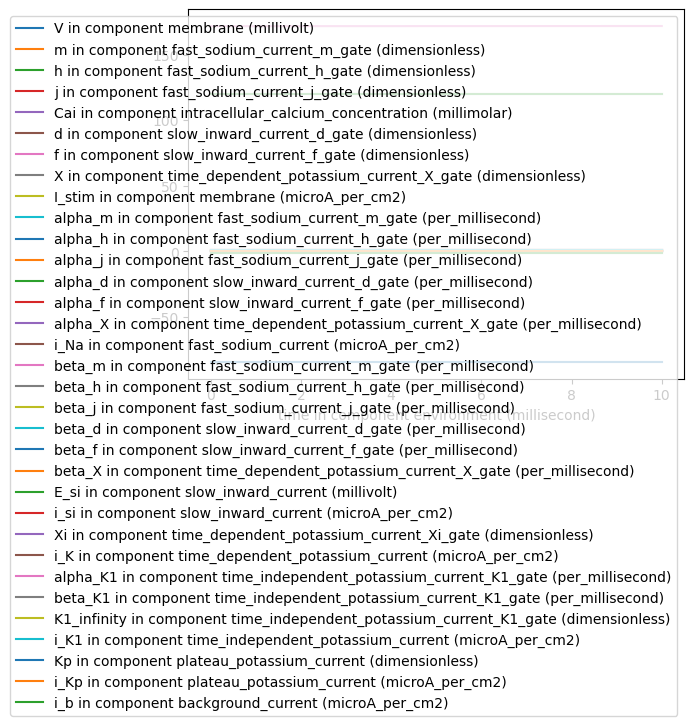

In [ ]:
import LuoRudy91

(voi, states, algebraic) = LuoRudy91.solve_model()
LuoRudy91.plot_model(voi, states, algebraic)

## Modelo de Courtemanche para Potenciales Auriculares

El modelo de Courtemanche, desarrollado en 1998, representa una mejora significativa en la simulación de la electrofisiología auricular. Este modelo incorpora una descripción detallada de las corrientes iónicas y las dinámicas de las compuertas de activación e inactivación, lo que permite una representación más precisa del potencial de acción auricular.


### Componente: corriente de sodio rápida

$$
i_{Na} = Cm \cdot g_{Na} \cdot m^3 \cdot h \cdot j \cdot (V - E_{Na})
$$

$$
E_{Na} = \frac{RT}{F} \ln \left( \frac{Na_o}{Na_i} \right)
$$

### Componente: corriente de sodio rápida m_gate

$$
\alpha_m = 
\begin{cases} 
3.2 & \text{si } V = -47.13 \\
0.32 \cdot (V + 47.13) / (1 - e^{-0.1 \cdot (V + 47.13)}) & \text{de lo contrario}
\end{cases}
$$

$$
\beta_m = 0.08 \cdot e^{-V / 11}
$$

$$
m_{inf} = \frac{\alpha_m}{\alpha_m + \beta_m}
$$

$$
\tau_m = \frac{1}{\alpha_m + \beta_m}
$$

$$
\frac{d}{dt} m = \frac{m_{inf} - m}{\tau_m}
$$

## Componente: corriente de sodio rápida h_gate

$$
\alpha_h = 
\begin{cases} 
0.135 \cdot e^{(V + 80) / -6.8} & \text{si } V < -40 \\
0 & \text{de lo contrario}
\end{cases}
$$

$$
\beta_h = 
\begin{cases} 
3.56 \cdot e^{0.079 \cdot V} + 3.1 \cdot 10^5 \cdot e^{0.35 \cdot V} & \text{si } V < -40 \\
0.13 \cdot (1 + e^{(V + 10.66) / -11.1})^{-1} & \text{de lo contrario}
\end{cases}
$$

$$
h_{inf} = \frac{\alpha_h}{\alpha_h + \beta_h}
$$

$$
\tau_h = \frac{1}{\alpha_h + \beta_h}
$$

$$
\frac{d}{dt} h = \frac{h_{inf} - h}{\tau_h}
$$

### Componente: corriente de sodio rápida j_gate

$$
\alpha_j = 
\begin{cases} 
\left( -1.2714 \cdot 10^5 \cdot e^{0.2444 \cdot V} - 3.474 \cdot 10^{-5} \cdot e^{-0.04391 \cdot V} \right) \cdot (V + 37.78) / (1 + e^{0.311 (V + 79.23)}) & \text{si } V < -40 \\
0 & \text{de lo contrario}
\end{cases}
$$

$$
\beta_j = 
\begin{cases} 
0.1212 e^{-0.01052 V} / (1 + e^{-0.1378 (V + 40.14)}) & si V < -40 \\
0.3 e^{-2.535e-7 V} / (1 + e^{-0.1 (V + 32)}) & de lo contrario
\end{cases}
$$

$$
j_{inf} = \frac{\alpha_j}{\alpha_j + \beta_j}
$$

$$
\tau_j = \frac{1}{\alpha_j + \beta_j}
$$

$$
\frac{d}{dt} j = \frac{j_{inf} - j}{tau_j}
$$

### Componente: corriente de potasio independiente del tiempo

$$
E_K = \frac{RT}{F} ln(frac{K_o}{K_i})
$$

$$
i_{K1} = Cm g_{K1}(V - E_K) / (1 + e^{0.07(V + 80)})
$$

### Componente: corriente transitoria de potasio hacia afuera

$$
i_{to} = Cm g_{to} oa^3 oi(V - E_K)
$$

### Componente: corriente transitoria de potasio hacia afuera oa_gate

$$
\alpha_oa = 0.65(e^{(V - (-10)) / -8.5} + e^{(V - (-10)) / -59})^{-1}
$$

$$
\beta_oa = 0.65(2.5 + e^{(V - (-10)) / 17})^{-1}
$$

$$
tau_oa = (\alpha_oa + \beta_oa)^{-1} K_Q10
$$

$$
oa_infinity = (1 + e^{(V - (-10)) / 10.47})^{-17.54}
$$

### Componente: corriente transitoria de potasio hacia afuera oi_gate

$$
\alpha_oi = (18.53 + e^{(V - (-10)) / 10.95})^{-1}
$$

$$
\beta_oi = (35.56 + e^{(V - (-10)) / -7.44})^{-1}
$$


### Componente: Corriente rectificadora retardada rápida de K\($^+$\)
- **\($i_{Kr}$\)**: \($C_m g_{Kr} xr (V - E_K) \left(1 + e^{\frac{V + 15}{22.4}}\right)^{-1}$\)

#### Puerta \($xr$\)
- **\($\alpha_{xr}$\)**:
  \[
  \alpha_{xr} = 
  \begin{cases} 
  0.0015 & \text{si } |V + 14.1| < 1e^{-10} \\
  0.0003 (V + 14.1) \left(1 - e^{\frac{V + 14.1}{-5}}\right)^{-1} & \text{en otro caso}
  \end{cases}
  \]
- **\($\beta_{xr}\$)**:
  \[
  \beta_{xr} = 
  \begin{cases} 
  3.7836118e^{-4} & \text{si } |V - 3.3328| < 1e^{-10} \\
  0.000073898 (V - 3.3328) e^{\frac{V - 3.3328}{5.1237}} & \text{en otro caso}
  \end{cases}
  \]
- **\($\tau_{xr}$\)**: \($(\alpha_{xr} + \beta_{xr})^{-1}$\)
- **\($xr_{\infty}$\)**: \($(1 + e^{\frac{V + 14.1}{-6.5}})^{-1}$\)
- **\($\frac{d}{dt}xr$\)**: \($\frac{xr_{\infty} - xr}{\tau_{xr}}$\)

### Componente: Corriente rectificadora retardada lenta de K\($^+$\)
- **\($i_{Ks}$\)**: \($C_m g_{Ks} xs^2 (V - E_K)$\)

#### Puerta \($xs$\)
- **\($\alpha_{xs}$\)**:
  \[
  \alpha_{xs} = 
  \begin{cases} 
  0.00068 & \text{si } |V - 19.9| < 1e^{-10} \\
  0.00004 (V - 19.9) \left(1 - e^{\frac{V - 19.9}{-17}}\right)^{-1} & \text{en otro caso}
  \end{cases}
  \]
- **\($\beta_{xs}$\)**:
  \[
  \beta_{xs} = 
  \begin{cases} 
  0.000315 & \text{si } |V - 19.9| < 1e^{-10} \\
  0.000035 (V - 19.9) e^{\frac{V - 19.9}{9}} & \text{en otro caso}
  \end{cases}
  \]
- **\($\tau_{xs}$\)**: \($0.5 (\alpha_{xs} + \beta_{xs})^{-1}$\)
- **\($xs_{\infty}$\)**: \($(1 + e^{\frac{V - 19.9}{-12.7}})^{-0.5}$\)
- **\($\frac{d}{dt}xs$\)**: \($\frac{xs_{\infty} - xs}{\tau_{xs}}$\)

### Componente: Canal de Ca\($^2+$\) tipo L
- **\($i_{Ca_L}$\)**: \($C_m g_{Ca_L} d f f_{Ca} (V - 65)$\)

#### Puerta \($d$\)
- **\($d_{\infty}$\)**: \($(1 + e^{\frac{V + 10}{-8}})^{-1}$\)
- **\($\tau_d$\)**:
  \[
  \tau_d = 
  \begin{cases} 
  4.5791 + e^{\frac{V + 10}{-6.24}} & \text{si } |V + 10| < 1e^{-10} \\
  \left(1 - e^{\frac{V + 10}{-6.24}}\right) 0.035 (V + 10) \left(1 + e^{\frac{V + 10}{-6.24}}\right)^{-1} & \text{en otro caso}
  \end{cases}
  \]
- **\($\frac{d}{dt}d$\)**: \($\frac{d_{\infty} - d}{\tau_d}$\)

#### Puerta \($f$\)
- **\($f_{\infty}$\)**: \($e^{\frac{-(V + 28)}{6.9}} + e^{\frac{-(V + 28)}{6.9}}$\)
- **\($\tau_f$\)**: \($9 \left(0.0197 e^{-(0.0337)(V + 10)^2} + 0.02\right)^{-1}$\)
- **\($\frac{d}{dt}f$\)**: \($\frac{f_{\infty} - f}{\tau_f}$\)

#### Puerta \($f_{Ca}$\)
- **\($f_{Ca_{\infty}}$\)**: \($(1 + Ca_i / 0.00035)^{-1}$\)
- **\($\tau_{f_{Ca}}$\)**: \($2$\)
- **\($\frac{d}{dt}f_{Ca}$\)**: \($\frac{f_{Ca_{\infty}} - f_{Ca}}{\tau_{f_{Ca}}}$\)

### Componente: Bomba de sodio-potasio
- **\($\sigma$\)**: \($17 \left(e^{\frac{Na_o}{67.3}} - 1\right)$\)
- **\($f_{NaK}$\)**: \($(1 + 0.1245 e^{\frac{-0.1 F V}{R T}} + 0.0365 \sigma e^{\frac{-F V}{R T}})^{-1}$\)
- **\($i_{NaK}$\)**: \($C_m i_{NaK_{max}} f_{NaK} \left(1 + \left(\frac{K_{m_{Na_i}}}{Na_i}\right)^{1.5}\right)^{-1} \left(\frac{K_o}{K_o + K_{m_{K_o}}}\right)$\)

### Componente: Corrientes de fondo
- **\($E_{Ca}$\)**: \($\frac{R T}{2 F} \ln \left(\frac{Ca_o}{Ca_i}\right)$\)
- **\($i_{B_{Na}}$\)**: \($C_m g_{B_{Na}} (V - E_{Na})$\)
- **\($i_{B_{Ca}}$\)**: \($C_m g_{B_{Ca}} (V - E_{Ca})$\)
- **\($i_{B_{K}}$\)**: \($C_m g_{B_{K}} (V - E_{K})$\)

### Componente: Corriente intercambiadora de Na\($^+$\)/Ca\($^2+$\)
- **\($i_{NaCa}$\)**: \($C_m I_{NaCa_{max}} \left(\frac{e^{\frac{\gamma F V}{R T}} Na_i^3 Ca_o - e^{\frac{(\gamma - 1) F V}{R T}} Na_o^3 Ca_i}{(K_{mNa}^3 + Na_o^3)(K_{mCa} + Ca_o) \left(1 + K_{sat} e^{\frac{(\gamma - 1) F V}{R T}}\right)}\right)$\)

### Componente: Corriente de la bomba de calcio sarcolemal
- **\($i_{CaP}$\)**: \($C_m i_{CaP_{max}} \left(\frac{Ca_i}{0.0005 + Ca_i}\right)$\)

### Componente: Corriente de liberación de Ca\($^2+$\) del JSR
- **\($Fn$\)**: \($1e^3 \left(1e^{-15} V_{rel} i_{rel} - \left(1e^{-15} \frac{2 F}{0.5 i_{Ca_L} - 0.2 i_{NaCa}}\right)\right)$\)
- **\($i_{rel}$\)**: \($K_{rel} u^2 v w (Ca_{rel} - Ca_i)$\)

#### Puerta \($u$\)
- **\($\tau_u$\)**: \($8$\)
- **\($u_{\infty}$\)**: \($(1 + e^{\frac{-(Fn - 3.4175e^{-13})}{13.67e^{-16}}})^{-1}$\)
- **\($\frac{d}{dt}u$\)**: \($\frac{u_{\infty} - u}{\tau_u}$\)

#### Puerta \($v$\)
- **\($\tau_v$\)**: \($1.91 + 2.09 \left(1 + e^{\frac{-(Fn - 3.4175e^{-13})}{13.67e^{-16}}}\right)^{-1}$\)
- **\($v_{\infty}$\)**: \($1 - \left(1 + e^{\frac{-(Fn - 6.835e^{-14})}{13.67e^{-16}}}\right)^{-1}$\)
- **\($\frac{d}{dt}v$\)**: \($\frac{v_{\infty} - v}{\tau_v}$\)

### Componente: Corriente de liberación de Ca\($^2+$\) del JSR - Puerta \($w$\)
- **\($\tau_w$\)**:
  \[
  \tau_w = 
  \begin{cases} 
  60 & \text{si } |V - 7.9| < 1e^{-10} \\
  21.3 \left(1 - e^{\frac{-(V - 7.9)}{5}}\right) \left(1 + 0.3 e^{\frac{-(V - 7.9)}{5}}\right)^{-1} \left(V - 7.9\right)^{-1} & \text{en otro caso}
  \end{cases}
  \]
- **\($w_{\infty}$\)**: \($1 - \left(1 + e^{\frac{-(V - 40)}{17}}\right)^{-1}$\)
- **\($\frac{d}{dt}w$\)**: \($\frac{w_{\infty} - w}{\tau_w}$\)

### Componente: Corriente de transferencia del NSR al JSR
- **\($i_{tr}$\)**: \($\frac{Ca_{up} - Ca_{rel}}{\tau_{tr}}$\)

### Componente: Corriente de captación de Ca\($^2+$\) por el NSR
- **\($i_{up}$\)**: \($I_{up_{max}} \left(1 + \frac{K_{up}}{Ca_i}\right)^{-1}$\)

### Componente: Corriente de fuga de Ca\($^2+$\) del NSR
- **\($i_{up_{leak}}$\)**: \($I_{up_{max}} \frac{Ca_{up}}{Ca_{up_{max}}}$\)

### Componente: Buffers de Ca\($^2+$\)
- **\($Ca_{CMDN}$\)**: \($\frac{CMDN_{max} Ca_i}{Ca_i + K_{mCMDN}}$\)
- **\($Ca_{TRPN}$\)**: \($\frac{TRPN_{max} Ca_i}{Ca_i + K_{mTRPN}}$\)
- **\($Ca_{CSQN}$\)**: \($\frac{CSQN_{max} Ca_{rel}}{Ca_{rel} + K_{mCSQN}}$\)

### Componente: Concentraciones iónicas intracelulares
- **\($V_i$\)**: \($V_{cell} \cdot 0.68$\)
- **\($V_{rel}$\)**: \($0.0048 \cdot V_{cell}$\)
- **\($V_{up}$\)**: \($0.0552 \cdot V_{cell}$\)
- **\($\frac{d}{dt}Na_i$\)**: \($\left(-3 i_{NaK} - 3 i_{NaCa} - i_{B_{Na}} - i_{Na}\right) \frac{V_i}{F}$\)
- **\($\frac{d}{dt}K_i$\)**: \($\left(2 i_{NaK} - i_{K1} - i_{to} - i_{Kur} - i_{Kr} - i_{Ks} - i_{B_{K}}\right) \frac{V_i}{F}$\)
- **\($\frac{d}{dt}Ca_i$\)**: \($B_1 / B_2$\)

#### \($B_1$\)
- \($B_1 = \left(2 i_{NaCa} - i_{CaP} - i_{Ca_L} - i_{B_{Ca}}\right) \frac{2 V_i}{F} + V_{up} \left(i_{up_{leak}} - i_{up}\right) + i_{rel} \frac{V_{rel}}{V_i}$\)

#### \($B_2$\)
- \($B_2 = 1 + \frac{TRPN_{max}}{K_{mTRPN}} \left(\frac{Ca_i + K_{mTRPN}}{Ca_i + K_{mTRPN}}\right)^2 + \frac{CMDN_{max}}{K_{mCMDN}} \left(\frac{Ca_i + K_{mCMDN}}{Ca_i + K_{mCMDN}}\right)^2$\)

- **\($\frac{d}{dt}Ca_{up}$\)**: \($i_{up} - \left(i_{up_{leak}} + i_{tr} \frac{V_{rel}}{V_{up}}\right)$\)
- **\($\frac{d}{dt}Ca_{rel}$\)**: \($\left(i_{tr} - i_{rel}\right) \left(1 + \frac{CSQN_{max}}{K_{mCSQN}} \left(\frac{Ca_{rel} + K_{mCSQN}}{Ca_{rel} + K_{mCSQN}}\right)^2\right)^{-1}$\)


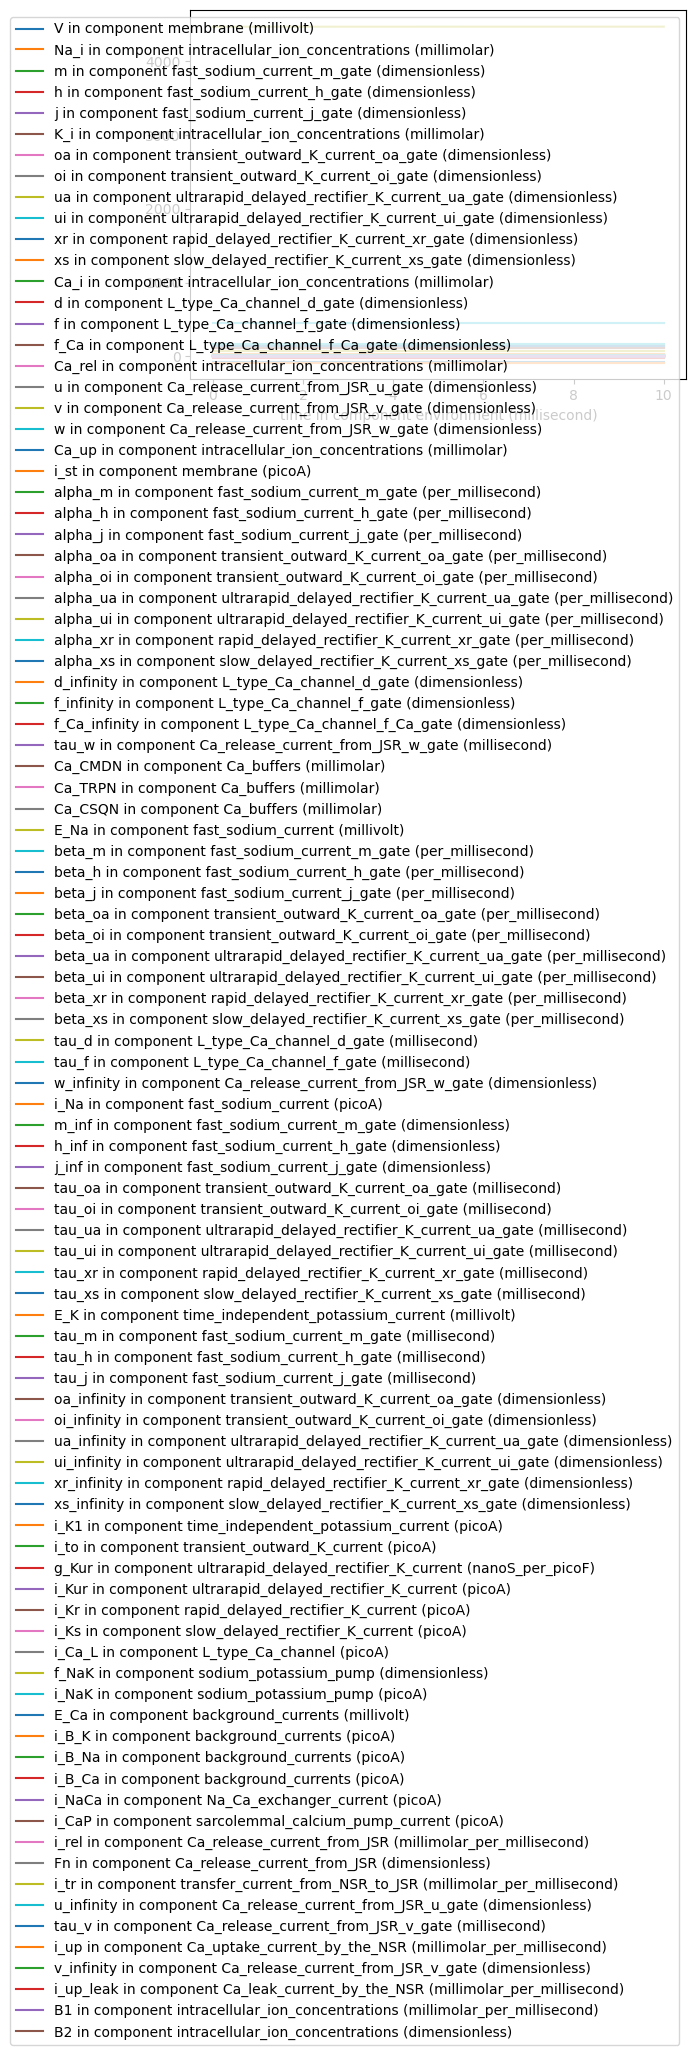

In [ ]:
import Courtemanche

(voi, states, algebraic) = Courtemanche.solve_model()
Courtemanche.plot_model(voi, states, algebraic)

## Usos de las Señales de ECG en el Diagnóstico de Arritmias Cardíacas

Las enfermedades cardiovasculares (ECV) son una de las principales causas de mortalidad en todo el mundo. La creación de técnicas precisas y rápidas para la clasificación automatizada de señales de latidos del corazón en ECG es vital para el diagnóstico clínico de diferentes ECV (Thaler, 1999), por ejemplo, una arritmia. El término arritmia se emplea para representar un grupo de circunstancias en las que actividades eléctricas irregulares provenientes del corazón se caracterizan por latidos o patrones en el ECG (Chazal, O’Dwyer, & Reilly, 2004; Pan & Tompkins, 1985). El ECG es una herramienta efectiva, simple y no invasiva para el reconocimiento de enfermedades cardíacas. Los médicos investigan varias formas de onda basándose en sus características (amplitud, polaridad, etc.) y diagnostican y tratan basándose en esta investigación.


#### Información del Conjunto de Datos
El Hospital Beth Israel de Boston y el MIT han mantenido un estudio sobre el análisis de arritmias y temas relacionados. Uno de los primeros logros importantes de este esfuerzo fue la base de datos MIT-BIH Arrhythmia, que comenzó a distribuirse en 1980. La base de datos fue el primer conjunto de datos de material de prueba estándar accesible públicamente para la evaluación de detectores de arritmias y se ha utilizado para este fin, así como para la investigación básica sobre la dinámica cardíaca en más de 500 sitios en todo el mundo.

La base de datos MIT-BIH Arrhythmia incluye 48 extractos de media hora de grabaciones de ECG ambulatorias de 2 canales, tomadas de 47 sujetos estudiados por el Laboratorio de Arritmias de BIH entre 1975 y 1979. Veintitrés señales fueron seleccionadas aleatoriamente de un conjunto de 4000 señales de ECG ambulatorias de 24 horas grabadas de una población mixta de pacientes hospitalizados (aproximadamente 60%) y ambulatorios (aproximadamente 40%) en el Hospital Beth Israel de Boston; las 25 grabaciones restantes se eligieron del mismo conjunto para contener arritmias menos comunes pero clínicamente importantes que no estarían bien representadas en una muestra aleatoria pequeña. Las señales de ECG se muestrearon a 360 Hz por canal con una resolución de 11 bits en un rango de 10 mV. Dos o más cardiólogos interpretaron cada registro individualmente; los desacuerdos se resolvieron para obtener las anotaciones de referencia legibles por computadora para cada latido (aproximadamente 110,000 anotaciones en total) incluidas en la base de datos. Toda la base de datos MIT-BIH Arrhythmia ha sido accesible gratuitamente desde la creación de PhysioNet en septiembre de 1999. 



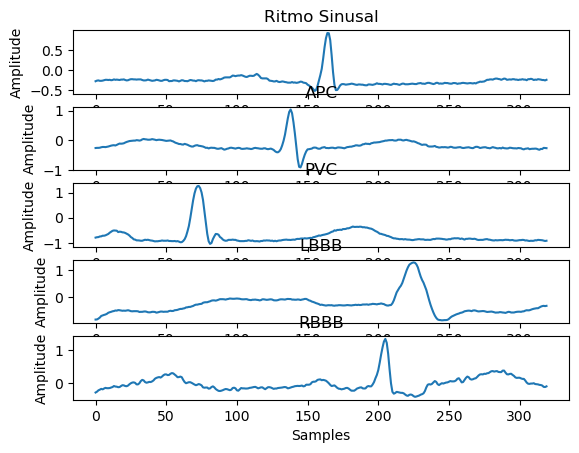

In [ ]:
import scipy.io
import matplotlib.pyplot as plt

# Cargar datos de ECG de muestra descargados del sitio web
# https://www.physionet.org/physiobank/database/mitdb/
data = scipy.io.loadmat("MITBIH_ECG.mat")

# Extraer señales de ECG
ECGN = data["ECGN"]
ECGAPC = data["ECGAPC"]
ECGPVC = data["ECGPVC"]
ECGLBBB = data["ECGLBBB"]
ECGRBBB = data["ECGRBBB"]

# Graficar señal de ECG NORMAL
plt.subplot(5, 1, 1)
plt.plot(ECGN[:, 0])
plt.title("Ritmo Sinusal")
plt.ylabel("Amplitude")


# Graficar señal de ECG APC
plt.subplot(5, 1, 2)
plt.plot(ECGAPC[:, 0])
plt.title("APC")
plt.xlabel("Samples")
plt.ylabel("Amplitude")


# Graficar señal de ECG PVC
plt.subplot(5, 1, 3)
plt.plot(ECGPVC[:, 0])
plt.title("PVC")
plt.xlabel("Samples")
plt.ylabel("Amplitude")


# Graficar señal de ECG LBBB
plt.subplot(5, 1, 4)
plt.plot(ECGLBBB[:, 0])
plt.title("LBBB")
plt.xlabel("Samples")
plt.ylabel("Amplitude")


# Graficar señal de ECG RBBB
plt.subplot(5, 1, 5)
plt.plot(ECGRBBB[:, 0])
plt.title("RBBB")
plt.xlabel("Samples")
plt.ylabel("Amplitude")


# Mostrar las gráficas
plt.show()

### Usos de las Señales de ECG en la Detección de Insuficiencia Cardíaca Congestiva

El corazón humano es el músculo más crucial del cuerpo humano, que junto con los vasos sanguíneos forma el sistema cardiovascular. Bombea sangre a cada célula del cuerpo humano. Además, el músculo cardíaco es el motor del cuerpo humano (Horobin, 2008). La insuficiencia cardíaca es un síndrome común que progresa gradualmente pero causa disfunción cardíaca debido a la incapacidad del corazón para bombear sangre de manera efectiva a todas las células del cuerpo humano. El corazón se deteriora a través de ataques cardíacos, presión arterial alta a largo plazo o una anomalía en una de las válvulas del corazón. Por lo tanto, la insuficiencia cardíaca generalmente no se detecta hasta que llega a la fase más avanzada, llamada insuficiencia cardíaca congestiva (ICC), que causa que el líquido fluya hacia los pulmones, los pies y la cavidad abdominal. La ICC es un trastorno que puede resultar de enfermedades cardíacas, como la enfermedad de las arterias coronarias, el daño al corazón después de un ataque cardíaco, la presión arterial alta, la enfermedad valvular cardíaca, la diabetes e incluso el alcoholismo (Masetic & Subasi, 2016; Quinn, 2006).

#### Información del Conjunto de Datos
Esta base de datos incluye señales de ECG a largo plazo tomadas de 15 sujetos (11 hombres, de 22 a 71 años, y 4 mujeres, de 54 a 63 años) con insuficiencia cardíaca congestiva severa (clase NYHA 3-4). Este grupo de sujetos formaba parte de un grupo de estudio más amplio que recibía terapia médica convencional antes de tomar el agente inotrópico oral, milrinona. Las diferentes señales tienen una duración de aproximadamente 20 horas e incluyen dos señales de ECG cada una muestreada a 250 Hz con una resolución de 12 bits en un rango de ±10 mV. Las señales analógicas originales se grabaron en el Hospital Beth Israel de Boston (ahora el Centro Médico Beth Israel Deaconess) utilizando grabadoras de ECG ambulatorias con un ancho de banda de grabación típico de aproximadamente 0.1 Hz. Los archivos de anotaciones (con el sufijo .ecg) se prepararon utilizando un detector automatizado y no se han corregido manualmente. 

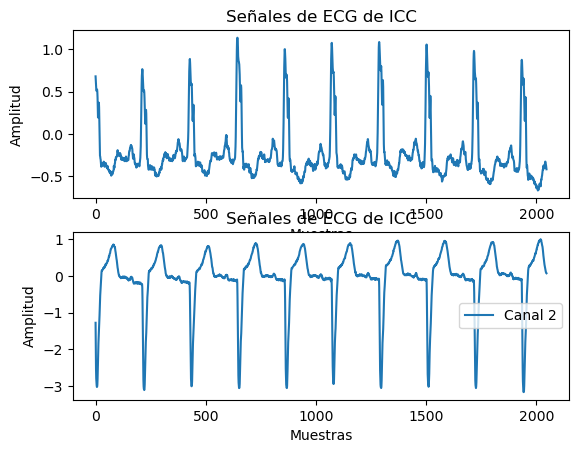

In [ ]:
import wfdb
import matplotlib.pyplot as plt


# Extraer las señales
signals, fields = wfdb.rdsamp("chf01", pn_dir="chfdb", sampfrom=1, sampto=2048)


# Graficar las señales de ECG de CHF
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(signals[:, 0], label="Canal 1")
plt.title("Señales de ECG de ICC")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.subplot(2, 1, 2)
plt.plot(signals[:, 1], label="Canal 2")
plt.title("Señales de ECG de ICC")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.legend()
plt.show()